In [9]:
import json
from sqlalchemy import create_engine, func

def _create_engine(conf_file, key):
    with open(conf_file, 'r') as f:
        conf = json.load(f)
        return create_engine(conf['local']['uri'])
engine = _create_engine('db-conf.json', 'local')

In [10]:
import pandas as pd
pd.sql = lambda sql: pd.read_sql(sql, con=engine)

def display_all(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(df)

%matplotlib inline

In [13]:
from furl import furl
import seaborn as sns

Najnovsie info o facebook engagemente pre sledovane URL

In [12]:
df = pd.sql('''
SELECT sq.*, s.url as source
FROM (
         SELECT afb.*, row_number() over (partition by url order by sync_date desc) rn
         FROM article_fb_engagement afb) sq
JOIN article a on sq.url = a.url
JOIN source s on a.source_id = s.id
WHERE sq.rn = 1;
''')

In [5]:
display_all(df.groupby('source')['reaction_count'].describe().sort_values('count', ascending=False))

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
http://naturalnews.com,20751.0,738.179558,29299.810937,0.0,4.00,45.0,142.00,3929532.0
http://naturalnewsblogs.com,17756.0,57.002422,1494.227896,0.0,0.00,0.0,0.00,132519.0
http://neurosciencenews.com,13106.0,170.110102,2720.819813,0.0,0.00,0.0,23.00,193676.0
http://statnews.com,12198.0,135.326365,1363.490678,0.0,0.00,0.0,10.00,69507.0
http://hsionline.com,8158.0,0.337828,5.589322,0.0,0.00,0.0,0.00,405.0
http://naturalsociety.com,7348.0,6.123979,364.742512,0.0,0.00,0.0,0.00,29874.0
http://healthnutnews.com,7200.0,1076.975833,18529.335091,0.0,1.00,113.0,495.00,1507921.0
http://healthimpactnews.com,6251.0,217.270837,7638.126151,0.0,0.00,0.0,3.00,595232.0
http://infowars.com,6019.0,29.726533,223.983248,0.0,0.00,0.0,0.00,8364.0


In [70]:
monitored_articles = pd.sql('''
SELECT afe.*, row_number() over (PARTITION BY url ORDER BY sync_date)
FROM article_fb_engagement afe
WHERE url in (SELECT url
              FROM article
                       JOIN monitored_article ma on article.id = ma.article_id)
ORDER BY url, sync_date;
''')

In [71]:
monitored_articles['popularity'] = monitored_articles['reaction_count'] + monitored_articles['comment_count'] + monitored_articles['share_count'] + monitored_articles['comment_plugin_count']

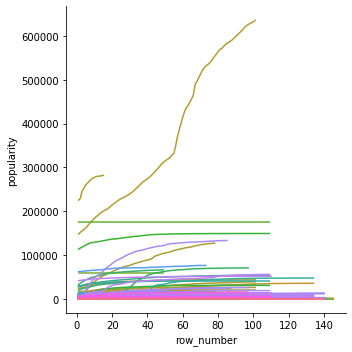

In [78]:
sns.relplot(data=monitored_articles,
            x='row_number', y='popularity',
            hue='url', kind='line',
            legend=False)